# Feature engineering

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
DATASET_DIR = "dataset" + os.sep

In [3]:
merged_df = pd.read_csv(DATASET_DIR + "merge_clean_v1.csv", parse_dates=["date"])
cyclist_df = pd.read_csv(DATASET_DIR + "cyclist_clean_v1.csv")
stages_df = pd.read_csv(DATASET_DIR + "stages_clean_v1.csv", parse_dates=["date"])

In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589694 entries, 0 to 589693
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   _url               589694 non-null  object        
 1   points             589694 non-null  int64         
 2   length             589694 non-null  float64       
 3   climb_total        442741 non-null  float64       
 4   profile            475315 non-null  float64       
 5   startlist_quality  589694 non-null  int64         
 6   date               589694 non-null  datetime64[ns]
 7   position           589694 non-null  int64         
 8   cyclist            589694 non-null  object        
 9   cyclist_age        589581 non-null  float64       
 10  delta              589694 non-null  int64         
 11  race               589694 non-null  object        
 12  year               589694 non-null  int64         
 13  stage              589694 non-null  object  

In [5]:
cyclist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6095 non-null   object 
 1   name         6095 non-null   object 
 2   birth_year   6084 non-null   float64
 3   weight       3134 non-null   float64
 4   height       3134 non-null   float64
 5   nationality  6095 non-null   object 
dtypes: float64(3), object(3)
memory usage: 285.8+ KB


In [6]:
stages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5281 entries, 0 to 5280
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _url               5281 non-null   object        
 1   stage              5281 non-null   object        
 2   race               5281 non-null   object        
 3   date               5281 non-null   datetime64[ns]
 4   points             5281 non-null   int64         
 5   length             5281 non-null   int64         
 6   climb_total        3067 non-null   float64       
 7   profile            3326 non-null   float64       
 8   startlist_quality  5281 non-null   int64         
 9   year               5281 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 412.7+ KB


## Feature creation

### Seasons

For features engineering we can discretize for example the date to extract the season (spring, winter ...) while for features novel we can create new feature to analyze in which seasons and in which years the cyclist is more active.

In [7]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"


# Apply the function to the date column to create a new season column
merged_df["season"] = merged_df["date"].apply(get_season)
stages_df["season"] = stages_df["date"].apply(get_season)
stages_df.tail(10)

_url   stage                race       date  \
5271  world-championship/2013/result  result  world-championship 2013-09-29   
5272  world-championship/2014/result  result  world-championship 2014-09-28   
5273  world-championship/2015/result  result  world-championship 2015-09-27   
5274  world-championship/2016/result  result  world-championship 2016-10-16   
5275  world-championship/2017/result  result  world-championship 2017-09-24   
5276  world-championship/2018/result  result  world-championship 2018-09-30   
5277  world-championship/2019/result  result  world-championship 2019-09-29   
5278  world-championship/2020/result  result  world-championship 2020-09-27   
5279  world-championship/2021/result  result  world-championship 2021-09-26   
5280  world-championship/2022/result  result  world-championship 2022-09-25   

      points  length  climb_total  profile  startlist_quality  year season  
5271     350  272200       3923.0      2.0               1630  2013   Fall  
5272     350  254800       4520.0      2.0               1535  2014   Fall  
5273     350  261400       2089.0      3.0               1353  2015   Fall  
5274     350  257300        401.0      1.0                998  2016   Fall  
5275     350  267500          NaN      2.0               1327  2017   Fall  
5276     350  258000       5020.0      4.0               1374  2018   Fall  
5277     350  260700       3220.0      2.0               1443  2019   Fall  
5278     350  258200       4662.0      2.0               1008  2020   Fall  
5279     350  268300       2250.0      2.0               1357  2021   Fall  
5280     350  266900       4167.0      2.0               1052  2022   Fall

### Aggregated columns (cyclists)

In [8]:
cyclist_df["avg_pos"] = merged_df.groupby("cyclist")["position"].transform("mean")
cyclist_df["num_races"] = merged_df.groupby("cyclist")["race"].transform("count")

### Body density

In [9]:
cyclist_df["BMI"] = cyclist_df["weight"] / (cyclist_df["height"] / 100) ** 2
merged_df["BMI"] = merged_df["weight"] / (merged_df["height"] / 100) ** 2

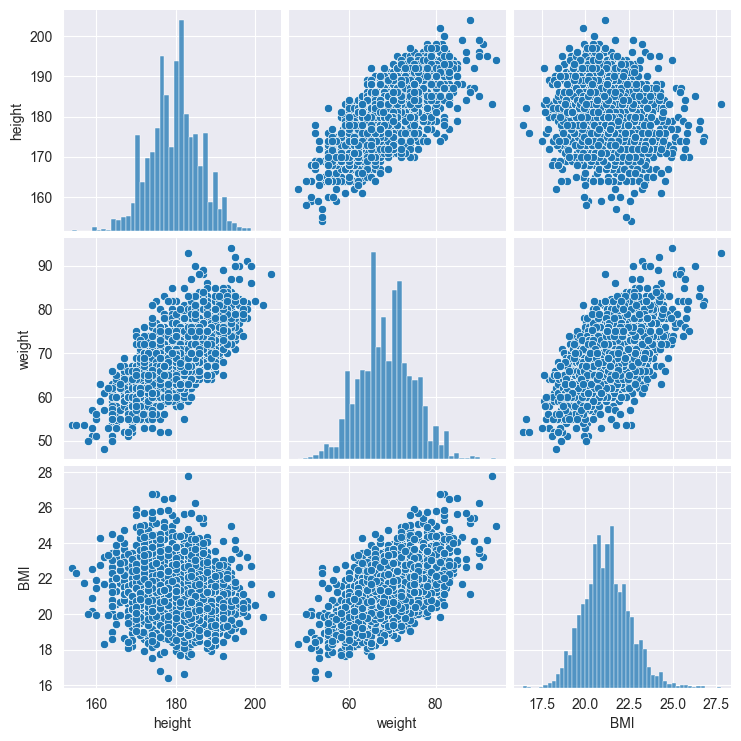

In [10]:
sns.pairplot(cyclist_df[["height", "weight", "BMI"]])

<Axes: >

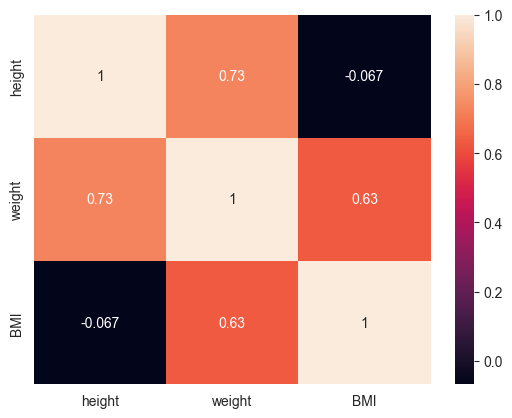

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cyclist_df[["height", "weight", "BMI"]])
scaled_df = pd.DataFrame(scaled_data, columns=["height", "weight", "BMI"])


correlation_matrix = scaled_df[["height", "weight", "BMI"]].corr()
sns.heatmap(correlation_matrix, annot=True)

Since weight higly correlated with both, I remove it

In [12]:
cyclist_df.drop(columns=["weight"], inplace=True)
merged_df.drop(columns=["weight"], inplace=True)

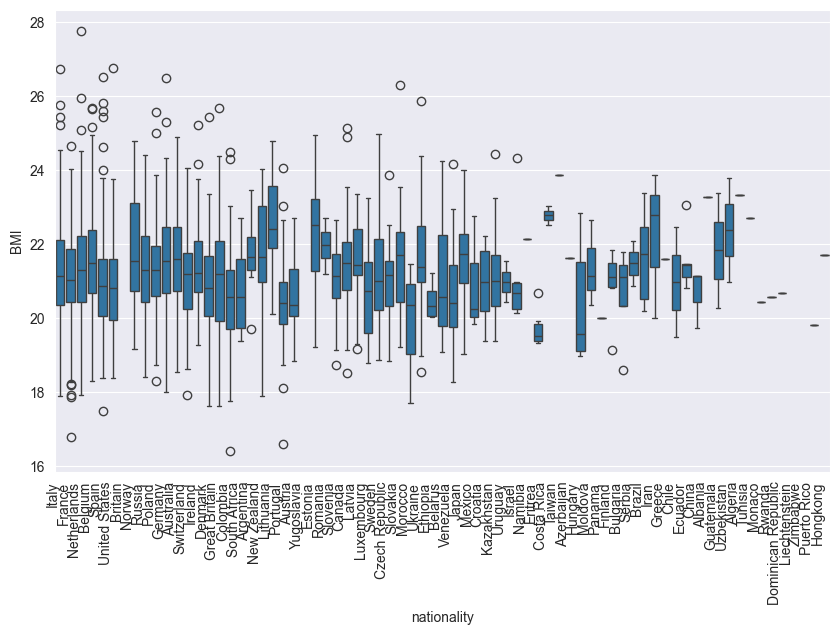

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="nationality", y="BMI", data=cyclist_df)
plt.xticks(rotation=90, ha="right")
plt.show()

### Continent

Getting continent of each cyclist

In [14]:
countries = cyclist_df.nationality.unique()

In [15]:
import pycountry_convert as pc


def get_continent(country_name):
    if country_name == "Yugoslavia":
        return "Europe"
    elif country_name == "Hongkong":
        return "Asia"
    elif country_name == "Britain":
        return "Europe"

    # print(country_name)
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(
        country_continent_code
    )
    # print(f"{country_name} is in {country_continent_name}")
    return country_continent_name


cyclist_df["continent"] = cyclist_df["nationality"].apply(get_continent)
merged_df["continent"] = merged_df["nationality"].apply(get_continent)
cyclist_df.head()

_url                  name  birth_year  height  \
0           bruno-surra          Bruno  Surra      1964.0     NaN   
1            gerard-rue           Gérard  Rué      1965.0   182.0   
2              jan-maas             Jan  Maas      1996.0   189.0   
3  nathan-van-hooydonck  Nathan Van Hooydonck      1995.0   192.0   
4      jose-felix-parra     José Félix  Parra      1997.0   171.0   

   nationality    avg_pos  num_races        BMI continent  
0        Italy  16.092210        629        NaN    Europe  
1       France  48.151292        271  22.340297    Europe  
2  Netherlands  47.239726        146  19.316369    Europe  
3      Belgium  16.145833         48  21.158854    Europe  
4        Spain  33.395833        144  18.809206    Europe

In [16]:
cyclist_df.continent.unique()
cyclist_df[cyclist_df["continent"].isna() & cyclist_df["nationality"].notna()]

Empty DataFrame
Columns: [_url, name, birth_year, height, nationality, avg_pos, num_races, BMI, continent]
Index: []

### Aggregated features (stages)

In [17]:
stages_df["count_by_url"] = merged_df.groupby("_url")["cyclist"].transform("count")

stages_df["avg_delta_by_url"] = merged_df.groupby("_url")["delta"].transform("mean")
stages_df["max_delta_by_url"] = merged_df.groupby("_url")["delta"].transform("max")

stages_df["avg_age_by_url"] = merged_df.groupby("_url")["cyclist_age"].transform("mean")
stages_df["max_age_by_url"] = merged_df.groupby("_url")["cyclist_age"].transform("max")
stages_df["min_age_by_url"] = merged_df.groupby("_url")["cyclist_age"].transform("min")
print(stages_df)

                                _url   stage                race       date  \
0       amstel-gold-race/1970/result  result    amstel-gold-race 1970-04-25   
1       amstel-gold-race/1971/result  result    amstel-gold-race 1971-03-28   
2       amstel-gold-race/1972/result  result    amstel-gold-race 1972-03-26   
3       amstel-gold-race/1973/result  result    amstel-gold-race 1973-04-07   
4       amstel-gold-race/1974/result  result    amstel-gold-race 1974-04-13   
...                              ...     ...                 ...        ...   
5276  world-championship/2018/result  result  world-championship 2018-09-30   
5277  world-championship/2019/result  result  world-championship 2019-09-29   
5278  world-championship/2020/result  result  world-championship 2020-09-27   
5279  world-championship/2021/result  result  world-championship 2021-09-26   
5280  world-championship/2022/result  result  world-championship 2022-09-25   

      points  length  climb_total  profile  startli

<Axes: >

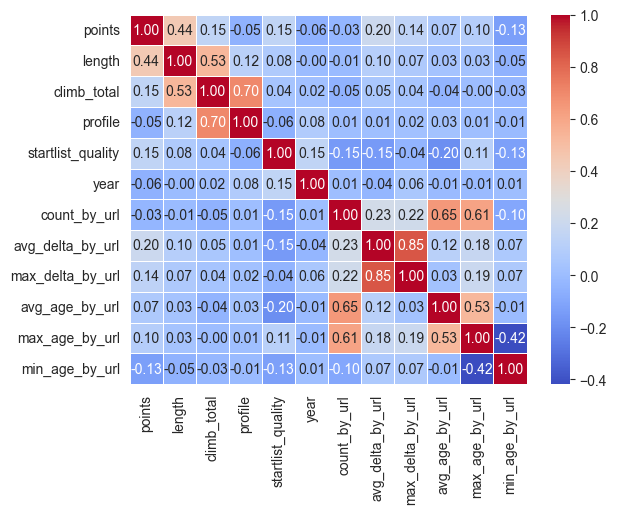

In [18]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stages_df.select_dtypes("number"))
scaled_df = pd.DataFrame(scaled_data, columns=stages_df.select_dtypes("number").columns)

corr_matrix = scaled_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

Features aggregated belonging to same table are always correlated to the others. We can drop those highly correlated and so keep only aggregated features beloning to different tables

In [19]:
stages_df.drop(
    columns=["max_age_by_url", "count_by_url", "max_delta_by_url"], inplace=True
)

<Axes: >

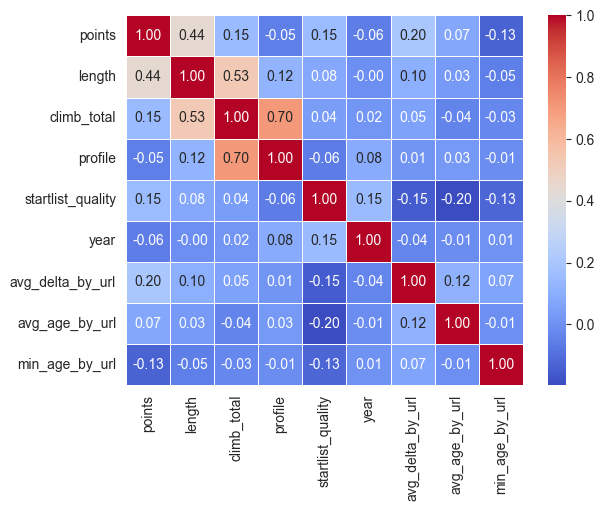

In [20]:
m = stages_df.select_dtypes("number").corr()
sns.heatmap(m, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

### Plots distributions for new features


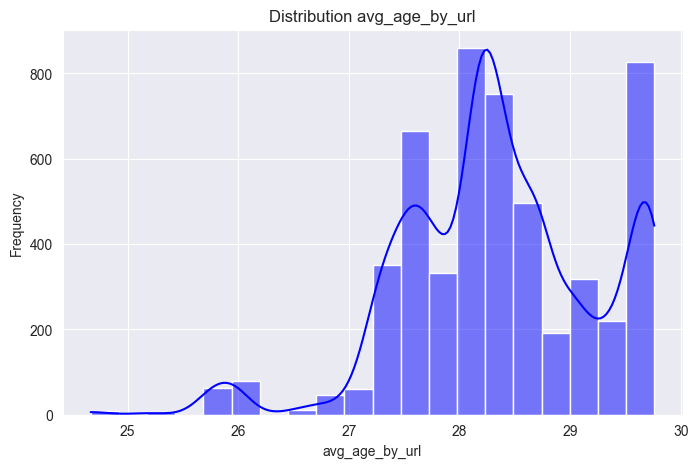

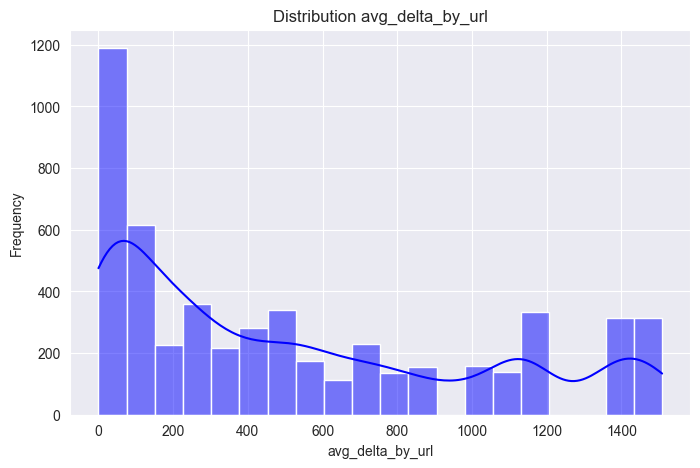

In [21]:
for column in ["avg_age_by_url", "avg_delta_by_url"]:
    plt.figure(figsize=(8, 5))
    sns.histplot(stages_df[column], kde=True, color="blue", bins=20)
    plt.title(f"Distribution {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

## Saving before anomaly detection

In [22]:
cyclist_df.to_csv(DATASET_DIR + "cyclist_clean_v2.csv", index=False)
merged_df.to_csv(DATASET_DIR + "merge_clean_v2.csv", index=False)
stages_df.to_csv(DATASET_DIR + "stages_clean_v2.csv", index=False)

## Anomaly Detection

### Cyclists

#### Outlier detection based on nationalities

In [23]:
# considering IQR to remove outliers
# The IQR is done grouping by nation as a first tentative

# threshold for which is ok to do outlier detection based on nationality
amount_threshold = 5

nationalities = cyclist_df.groupby("nationality")["_url"].size()
nationalities = nationalities[nationalities > amount_threshold]

filtered_cyclist_df = cyclist_df[cyclist_df["nationality"].isin(nationalities.index)]

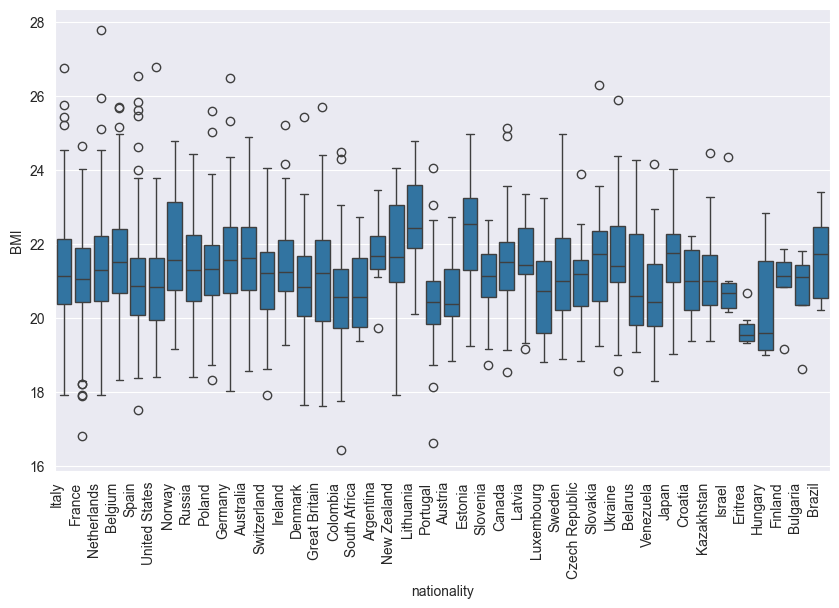

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="nationality", y="BMI", data=filtered_cyclist_df)
plt.xticks(rotation=90, ha="right")
plt.show()

#### Outlier detection based on general distribution

In [25]:
Q1 = cyclist_df[["height", "BMI"]].quantile(0.25)
Q3 = cyclist_df[["height", "BMI"]].quantile(0.75)
IQR = Q3 - Q1
mask = (cyclist_df[["height", "BMI"]] > (Q1 - 1.5 * IQR)) & (
    cyclist_df[["height", "BMI"]] < (Q3 + 1.5 * IQR)
)
cyclist_no_outliers_df = cyclist_df[mask.all(axis=1)]
cyclist_no_outliers_df

_url                  name  birth_year  height  \
1               gerard-rue           Gérard  Rué      1965.0   182.0   
2                 jan-maas             Jan  Maas      1996.0   189.0   
3     nathan-van-hooydonck  Nathan Van Hooydonck      1995.0   192.0   
4         jose-felix-parra     José Félix  Parra      1997.0   171.0   
5          manuel-penalver      Manuel  Peñalver      1998.0   177.0   
...                    ...                   ...         ...     ...   
6086       santos-gonzalez      Santos  González      1973.0   179.0   
6087     johannes-adamietz    Johannes  Adamietz      1998.0   174.0   
6091        inigo-elosegui       Iñigo  Elosegui      1998.0   188.0   
6093     jackson-rodriguez    Jackson  Rodríguez      1985.0   170.0   
6094          ward-vanhoof         Ward  Vanhoof      1999.0   186.0   

      nationality     avg_pos  num_races        BMI      continent  
1          France   48.151292        271  22.340297         Europe  
2     Netherlands   47.239726        146  19.316369         Europe  
3         Belgium   16.145833         48  21.158854         Europe  
4           Spain   33.395833        144  18.809206         Europe  
5           Spain   29.435484         62  21.385936         Europe  
...           ...         ...        ...        ...            ...  
6086        Spain  125.438596         57  21.847009         Europe  
6087      Germany   56.155203        567  20.147972         Europe  
6091        Spain   48.247059        595  21.220009         Europe  
6093    Venezuela   96.025346        434  20.069204  South America  
6094      Belgium  100.247191        356  21.678807         Europe  

[3069 rows x 9 columns]

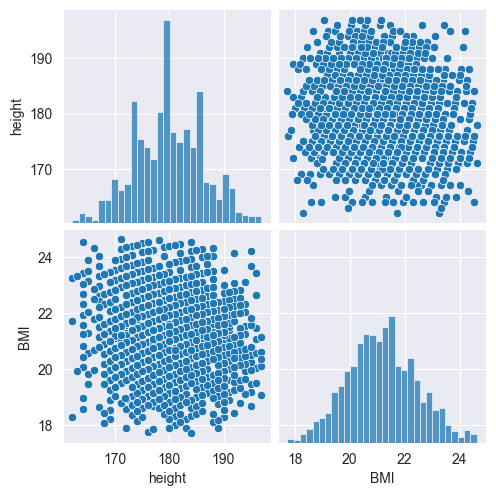

In [26]:
sns.pairplot(cyclist_no_outliers_df[["height", "BMI"]])

<Axes: ylabel='BMI'>

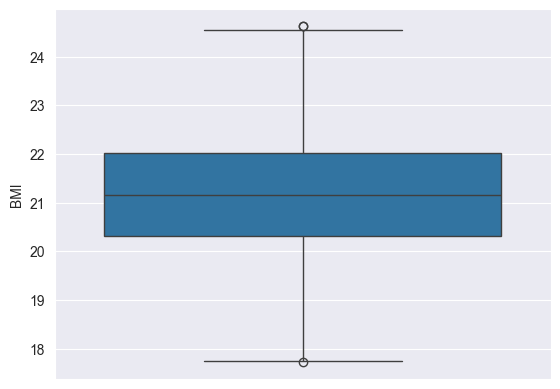

In [27]:
sns.boxplot(cyclist_no_outliers_df["BMI"])

#### Outlier detection based on continent

In [28]:
non_null_counts = cyclist_df.groupby("continent").apply(lambda x: x.notnull().sum())
non_null_counts

C:\Users\Tommaso\AppData\Local\Temp\ipykernel_15828\754547451.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  non_null_counts = cyclist_df.groupby("continent").apply(lambda x: x.notnull().sum())


_url  name  birth_year  height  nationality  avg_pos  \
continent                                                             
Africa           47    47          47      38           47       47   
Asia             81    81          81      68           81       81   
Europe         5348  5348        5338    2632         5348     5348   
North America   205   205         205     136          205      205   
Oceania         165   165         165     134          165      165   
South America   249   249         248     126          249      249   

               num_races   BMI  continent  
continent                                  
Africa                47    38         47  
Asia                  81    68         81  
Europe              5348  2632       5348  
North America        205   136        205  
Oceania              165   134        165  
South America        249   126        249

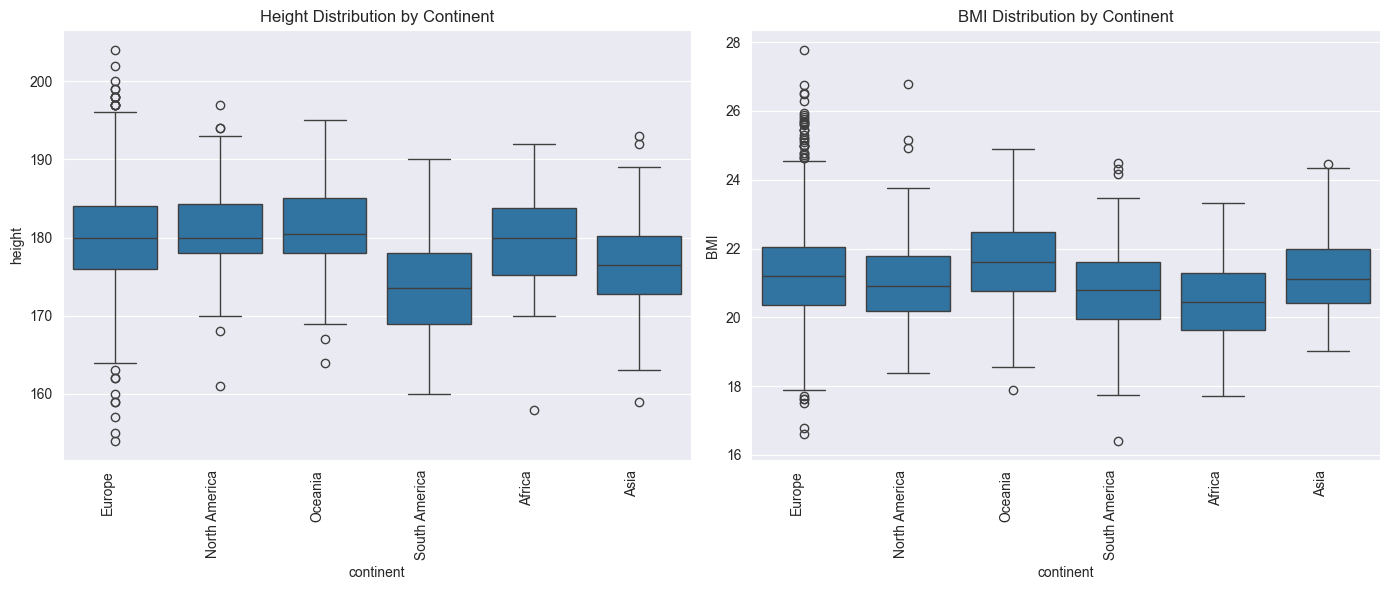

In [29]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="continent", y="height", data=cyclist_df)
plt.xticks(rotation=90, ha="right")
plt.title("Height Distribution by Continent")


plt.subplot(1, 2, 2)
sns.boxplot(x="continent", y="BMI", data=cyclist_df)
plt.xticks(rotation=90, ha="right")
plt.title("BMI Distribution by Continent")

plt.tight_layout()
plt.show()

In [30]:
# Remove outliers for height by continent
def iqr_outliers(group, column):
    Q1 = group[column].quantile(0.25)
    Q3 = group[column].quantile(0.75)
    IQR = Q3 - Q1
    mask = (group[column] >= (Q1 - 1.5 * IQR)) & (group[column] <= (Q3 + 1.5 * IQR))
    return group[mask]


cyclist_df_no_outliers_by_continent = cyclist_df.copy()

while True:
    old_shape = cyclist_df_no_outliers_by_continent.shape[0]
    cyclist_df_no_outliers_by_continent = (
        cyclist_df_no_outliers_by_continent.groupby("continent")
        .apply(lambda x: iqr_outliers(x, "height"))
        .reset_index(drop=True)
    )
    if cyclist_df_no_outliers_by_continent.shape[0] == old_shape:
        break

while True:
    old_shape = cyclist_df_no_outliers_by_continent.shape[0]
    cyclist_df_no_outliers_by_continent = (
        cyclist_df_no_outliers_by_continent.groupby("continent")
        .apply(lambda x: iqr_outliers(x, "BMI"))
        .reset_index(drop=True)
    )
    if cyclist_df_no_outliers_by_continent.shape[0] == old_shape:
        break

C:\Users\Tommaso\AppData\Local\Temp\ipykernel_15828\2311147090.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: iqr_outliers(x, "height"))
C:\Users\Tommaso\AppData\Local\Temp\ipykernel_15828\2311147090.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: iqr_outliers(x, "height"))
C:\Users\Tommaso\AppData\Local\Temp\ipykernel_15828\2311147090.py:16: DeprecationWarning: 

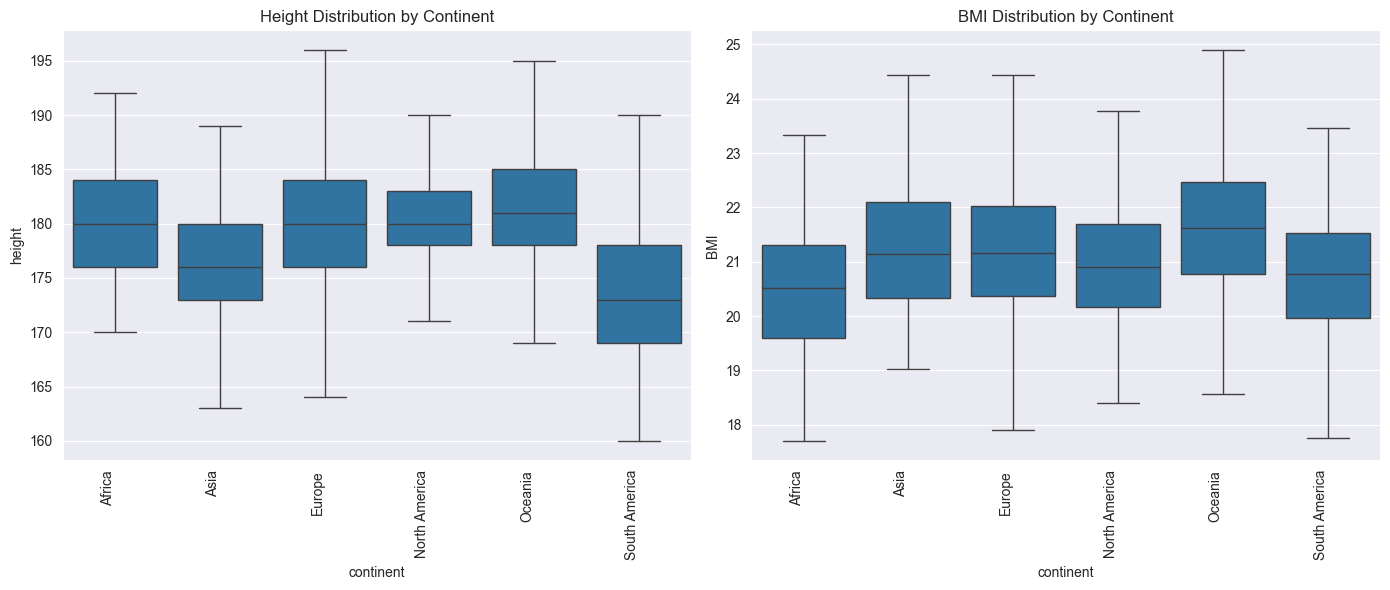

In [31]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="continent", y="height", data=cyclist_df_no_outliers_by_continent)
plt.xticks(rotation=90, ha="right")
plt.title("Height Distribution by Continent")


plt.subplot(1, 2, 2)
sns.boxplot(x="continent", y="BMI", data=cyclist_df_no_outliers_by_continent)
plt.xticks(rotation=90, ha="right")
plt.title("BMI Distribution by Continent")

plt.tight_layout()
plt.show()

In [32]:
cyclist_df = cyclist_df_no_outliers_by_continent

In [33]:
cyclist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         3039 non-null   object 
 1   name         3039 non-null   object 
 2   birth_year   3039 non-null   float64
 3   height       3039 non-null   float64
 4   nationality  3039 non-null   object 
 5   avg_pos      3039 non-null   float64
 6   num_races    3039 non-null   int64  
 7   BMI          3039 non-null   float64
 8   continent    3039 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 213.8+ KB


## Stages

### Outlier detection for profile based on climb total

<Axes: xlabel='profile', ylabel='climb_total'>

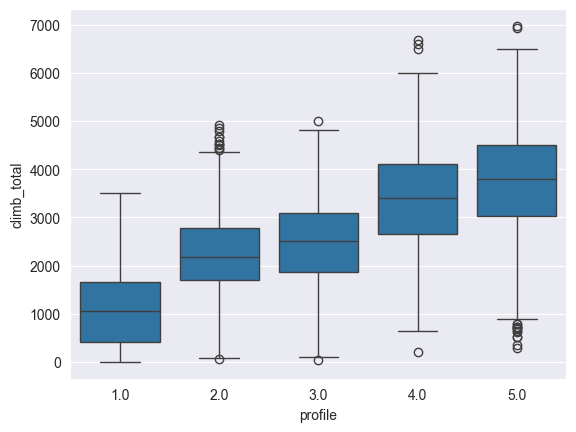

In [34]:
sns.boxplot(x="profile", y="climb_total", data=stages_df)

In [35]:
stages_df_no_outliers_profile = stages_df.copy()
while True:
    old_shape = stages_df_no_outliers_profile.shape[0]
    stages_df_no_outliers_profile = (
        stages_df_no_outliers_profile.groupby("profile")
        .apply(lambda x: iqr_outliers(x, "climb_total"))
        .reset_index(drop=True)
    )
    if stages_df_no_outliers_profile.shape[0] == old_shape:
        break

C:\Users\Tommaso\AppData\Local\Temp\ipykernel_15828\4132658247.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: iqr_outliers(x, "climb_total"))
C:\Users\Tommaso\AppData\Local\Temp\ipykernel_15828\4132658247.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: iqr_outliers(x, "climb_total"))
C:\Users\Tommaso\AppData\Local\Temp\ipykernel_15828\4132658247.py:6: DeprecationWa

<Axes: xlabel='profile', ylabel='climb_total'>

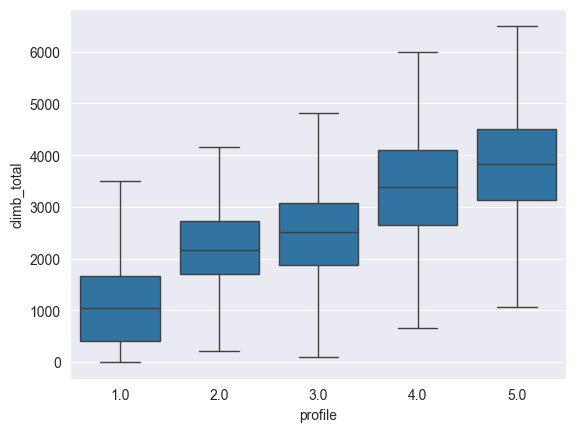

In [36]:
sns.boxplot(x="profile", y="climb_total", data=stages_df_no_outliers_profile)

In [37]:
stages_df_no_outliers_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _url               3021 non-null   object        
 1   stage              3021 non-null   object        
 2   race               3021 non-null   object        
 3   date               3021 non-null   datetime64[ns]
 4   points             3021 non-null   int64         
 5   length             3021 non-null   int64         
 6   climb_total        3021 non-null   float64       
 7   profile            3021 non-null   float64       
 8   startlist_quality  3021 non-null   int64         
 9   year               3021 non-null   int64         
 10  season             3021 non-null   object        
 11  avg_delta_by_url   3021 non-null   float64       
 12  avg_age_by_url     3021 non-null   float64       
 13  min_age_by_url     3021 non-null   float64       
dtypes: datet

In [38]:
stages_df = stages_df_no_outliers_profile

### Merged df

### Conform to changes in other dfs

In [39]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589694 entries, 0 to 589693
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   _url               589694 non-null  object        
 1   points             589694 non-null  int64         
 2   length             589694 non-null  float64       
 3   climb_total        442741 non-null  float64       
 4   profile            475315 non-null  float64       
 5   startlist_quality  589694 non-null  int64         
 6   date               589694 non-null  datetime64[ns]
 7   position           589694 non-null  int64         
 8   cyclist            589694 non-null  object        
 9   cyclist_age        589581 non-null  float64       
 10  delta              589694 non-null  int64         
 11  race               589694 non-null  object        
 12  year               589694 non-null  int64         
 13  stage              589694 non-null  object  

In [40]:
stages_to_merge = stages_df[
    [
        "_url",
        "stage",
        "race",
        "date",
        "points",
        "length",
        "climb_total",
        "profile",
        "startlist_quality",
        "year",
        "season",
    ]
]
stages_to_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _url               3021 non-null   object        
 1   stage              3021 non-null   object        
 2   race               3021 non-null   object        
 3   date               3021 non-null   datetime64[ns]
 4   points             3021 non-null   int64         
 5   length             3021 non-null   int64         
 6   climb_total        3021 non-null   float64       
 7   profile            3021 non-null   float64       
 8   startlist_quality  3021 non-null   int64         
 9   year               3021 non-null   int64         
 10  season             3021 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 259.7+ KB


In [41]:
cyclist_to_merge = cyclist_df[
    ["_url", "name", "birth_year", "height", "nationality", "continent", "BMI"]
]
cyclist_to_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         3039 non-null   object 
 1   name         3039 non-null   object 
 2   birth_year   3039 non-null   float64
 3   height       3039 non-null   float64
 4   nationality  3039 non-null   object 
 5   continent    3039 non-null   object 
 6   BMI          3039 non-null   float64
dtypes: float64(3), object(4)
memory usage: 166.3+ KB


In [42]:
merged_df = merged_df.merge(
    stages_to_merge, on="_url", how="inner", suffixes=("_old", "")
)
merged_df = merged_df.drop(columns=[col for col in merged_df.columns if "_old" in col])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436791 entries, 0 to 436790
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   _url               436791 non-null  object        
 1   position           436791 non-null  int64         
 2   cyclist            436791 non-null  object        
 3   cyclist_age        436691 non-null  float64       
 4   delta              436791 non-null  int64         
 5   birth_year         436755 non-null  float64       
 6   height             368388 non-null  float64       
 7   nationality        436791 non-null  object        
 8   BMI                368388 non-null  float64       
 9   continent          436791 non-null  object        
 10  stage              436791 non-null  object        
 11  race               436791 non-null  object        
 12  date               436791 non-null  datetime64[ns]
 13  points             436791 non-null  int64   

In [43]:
merged_df = merged_df.merge(
    cyclist_df, left_on="cyclist", right_on="_url", how="inner", suffixes=("_old", "")
)
merged_df.drop(columns=["_url", "name"], inplace=True)
merged_df.rename(columns={"_url_old": "_url"}, inplace=True)
merged_df = merged_df.drop(columns=[col for col in merged_df.columns if "_old" in col])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359327 entries, 0 to 359326
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   _url               359327 non-null  object        
 1   position           359327 non-null  int64         
 2   cyclist            359327 non-null  object        
 3   cyclist_age        359327 non-null  float64       
 4   delta              359327 non-null  int64         
 5   stage              359327 non-null  object        
 6   race               359327 non-null  object        
 7   date               359327 non-null  datetime64[ns]
 8   points             359327 non-null  int64         
 9   length             359327 non-null  int64         
 10  climb_total        359327 non-null  float64       
 11  profile            359327 non-null  float64       
 12  startlist_quality  359327 non-null  int64         
 13  year               359327 non-null  int64   

In [44]:
merged_df.drop(columns=["num_races", "avg_pos"], inplace=True)

In [45]:
merged_df = merged_df.convert_dtypes()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359327 entries, 0 to 359326
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   _url               359327 non-null  string        
 1   position           359327 non-null  Int64         
 2   cyclist            359327 non-null  string        
 3   cyclist_age        359327 non-null  Int64         
 4   delta              359327 non-null  Int64         
 5   stage              359327 non-null  string        
 6   race               359327 non-null  string        
 7   date               359327 non-null  datetime64[ns]
 8   points             359327 non-null  Int64         
 9   length             359327 non-null  Int64         
 10  climb_total        359327 non-null  Int64         
 11  profile            359327 non-null  Int64         
 12  startlist_quality  359327 non-null  Int64         
 13  year               359327 non-null  Int64   

## Data Understanding

### Cyclists

##### Correlation matrix

<Axes: >

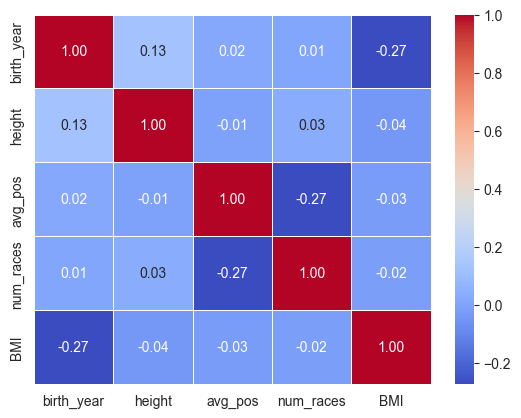

In [46]:
cyclist_df = cyclist_df.convert_dtypes()
correlation_matrix = cyclist_df.select_dtypes("number").corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

#### PCA of continents

In [47]:
from sklearn.decomposition import PCA
import numpy as np

In [48]:
cyclist_df["continent"] = cyclist_df["continent"].astype("category")

pca_instance = PCA(random_state=42)
pca_transformation = pca_instance.fit_transform(
    cyclist_df.select_dtypes("number").dropna()
)
eigenvalues = pca_instance.explained_variance_
scaled_eigenvalues = pca_instance.explained_variance_ratio_
eigenvectors = pca_instance.components_
transformation_norm_per_column = (pca_transformation**2).sum(axis=0)
cumulative_norm_per_reduction = np.cumsum(transformation_norm_per_column)
pca_dataframe = pd.DataFrame.from_records(
    zip(eigenvalues, scaled_eigenvalues, cumulative_norm_per_reduction),
    columns=["eigenvalues", "scaled_eigenvalues", "transformation_norm"],
)

Text(0.5, 1.0, 'Scree plot')

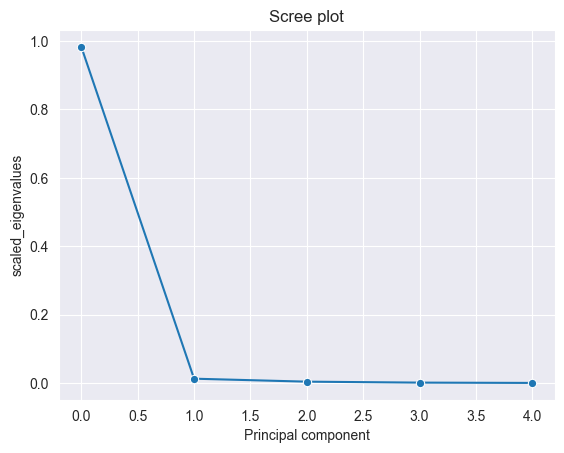

In [49]:
sns.lineplot(pca_dataframe, y="scaled_eigenvalues", x=pca_dataframe.index, marker="o")
plt.xlabel("Principal component")
plt.title("Scree plot")

Text(0.5, 1.0, 'Inverse scree plot')

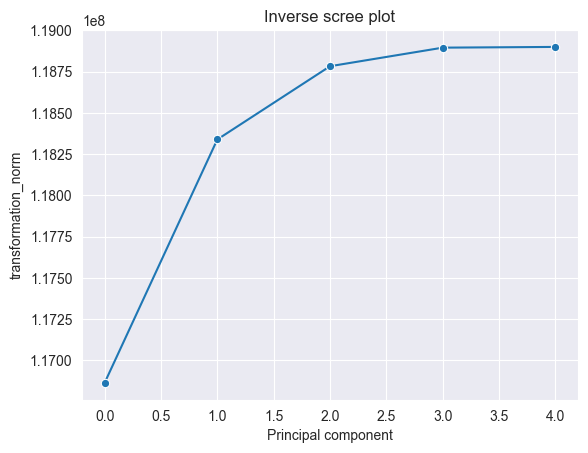

In [50]:
sns.lineplot(pca_dataframe, y="transformation_norm", x=pca_dataframe.index, marker="o")
plt.xlabel("Principal component")
plt.title("Inverse scree plot")

In [51]:
pca_df = pd.DataFrame(
    {
        "PC1": pca_transformation[:, 0],
        "PCA2": pca_transformation[:, 1],
        "continent": cyclist_df.dropna()["continent"],
    }
).reset_index(drop=True)

<Axes: xlabel='PC1', ylabel='PCA2'>

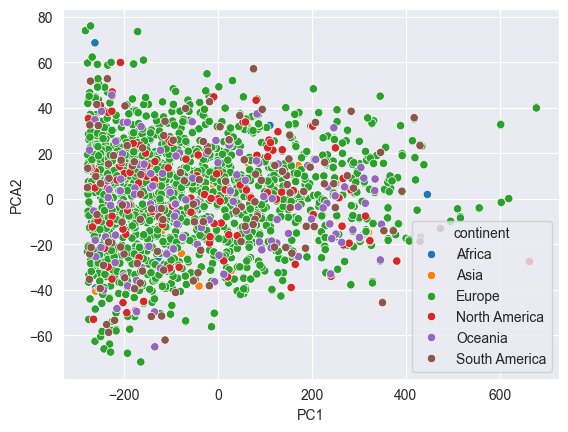

In [52]:
sns.scatterplot(data=pca_df, x="PC1", y="PCA2", hue="continent")

#### Performance vs physical build

Idea: see if better separation of continent is by physical attributes or performance attributes

In [53]:
cyclist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   _url         3039 non-null   string  
 1   name         3039 non-null   string  
 2   birth_year   3039 non-null   Int64   
 3   height       3039 non-null   Float64 
 4   nationality  3039 non-null   string  
 5   avg_pos      3039 non-null   Float64 
 6   num_races    3039 non-null   Int64   
 7   BMI          3039 non-null   Float64 
 8   continent    3039 non-null   category
dtypes: Float64(3), Int64(2), category(1), string(3)
memory usage: 208.1 KB


In [54]:
pca_1 = PCA(random_state=42)
pca_2 = PCA(random_state=42)

tr_1 = pca_1.fit_transform(cyclist_df[["height", "BMI", "birth_year"]])
tr_2 = pca_2.fit_transform(cyclist_df[["avg_pos", "num_races"]])

In [55]:
df_1 = pd.DataFrame(tr_1, columns=["PC1", "PC2", "PC3"])
df_1["continent"] = cyclist_df["continent"]
df_2 = pd.DataFrame(tr_2, columns=["PC1", "PC2"])
df_2["continent"] = cyclist_df["continent"]

<Axes: xlabel='PC1', ylabel='PC2'>

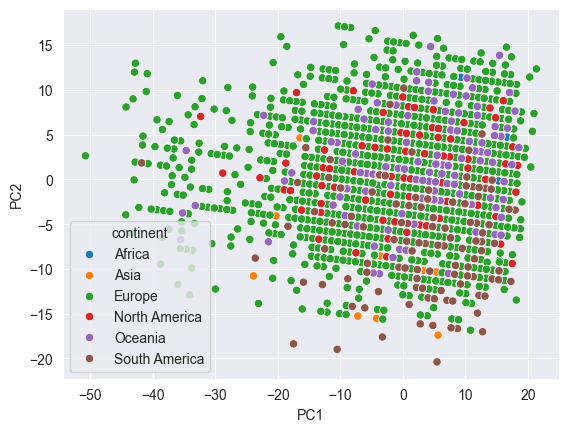

In [56]:
sns.scatterplot(data=df_1, x="PC1", y="PC2", hue="continent")
# sns.scatterplot(data=cyclist_df, x="avg_pos", y="num_races", hue="continent")

<Axes: xlabel='PC1', ylabel='PC2'>

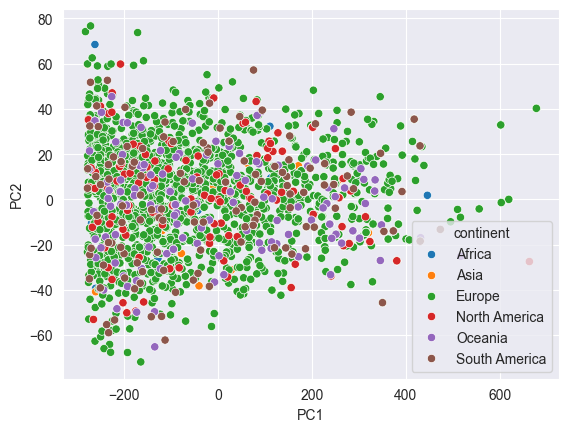

In [57]:
sns.scatterplot(data=df_2, x="PC1", y="PC2", hue="continent")

### Stages

#### Check statistics based on seasons

In [58]:
stages_df = stages_df.convert_dtypes()
stages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _url               3021 non-null   string        
 1   stage              3021 non-null   string        
 2   race               3021 non-null   string        
 3   date               3021 non-null   datetime64[ns]
 4   points             3021 non-null   Int64         
 5   length             3021 non-null   Int64         
 6   climb_total        3021 non-null   Int64         
 7   profile            3021 non-null   Int64         
 8   startlist_quality  3021 non-null   Int64         
 9   year               3021 non-null   Int64         
 10  season             3021 non-null   string        
 11  avg_delta_by_url   3021 non-null   Float64       
 12  avg_age_by_url     3021 non-null   Float64       
 13  min_age_by_url     3021 non-null   Int64         
dtypes: Float

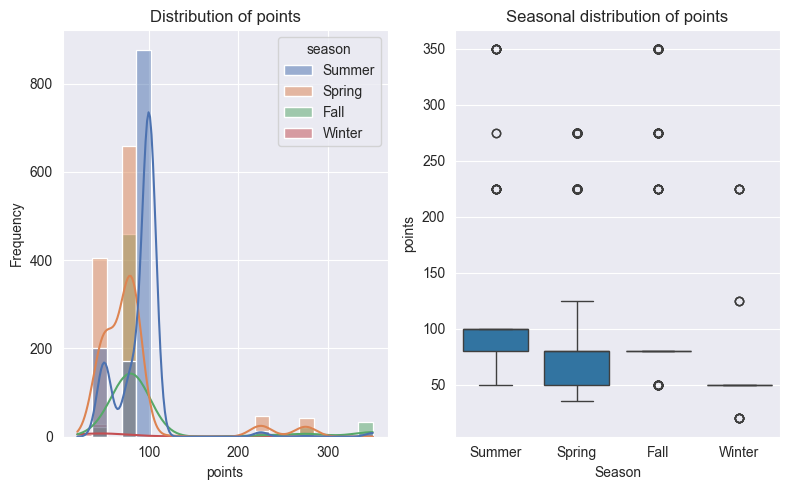

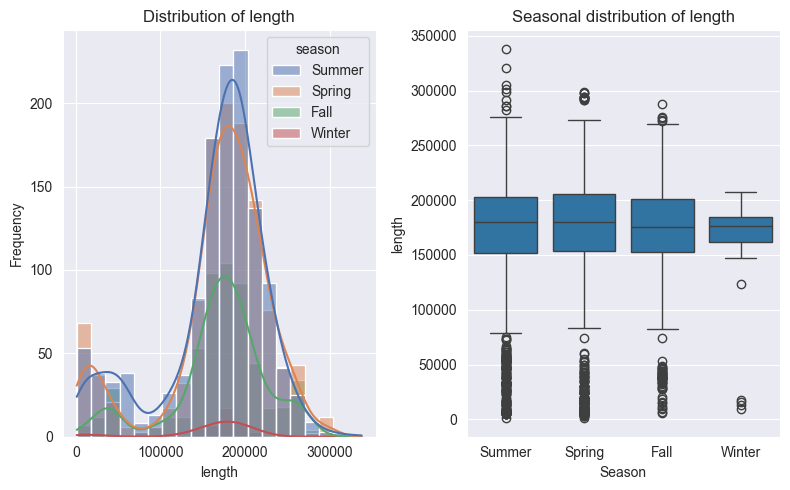

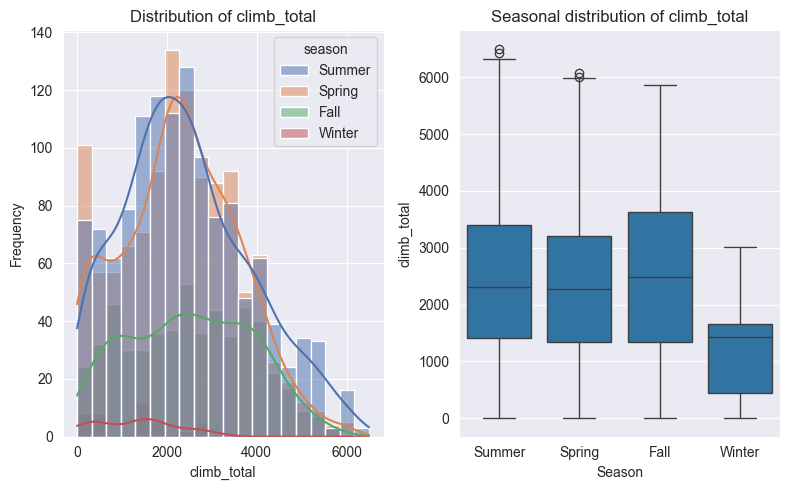

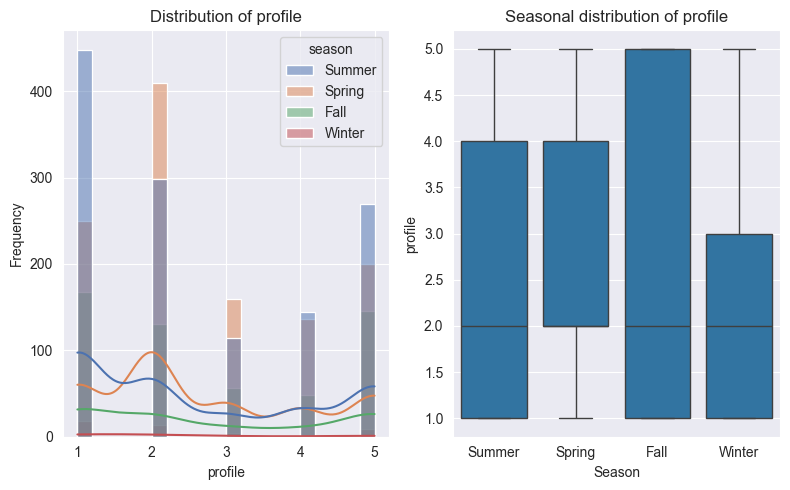

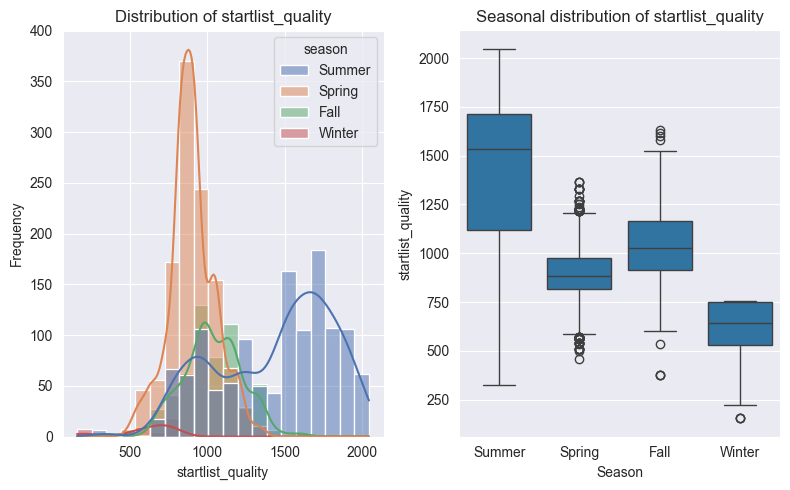

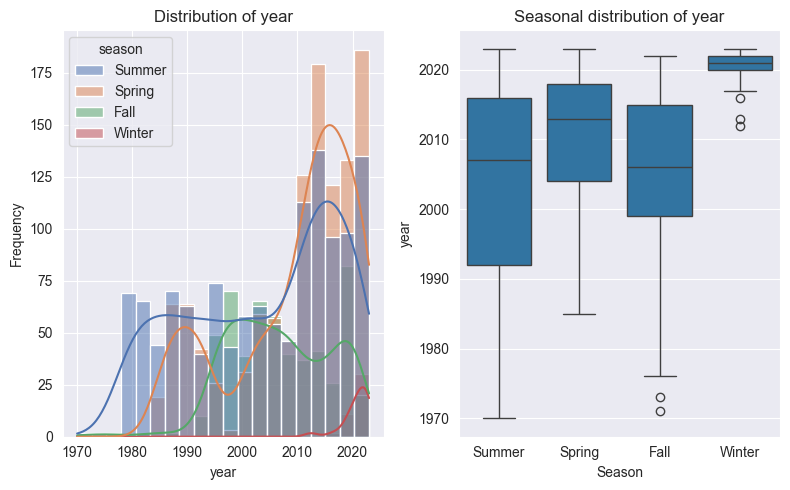

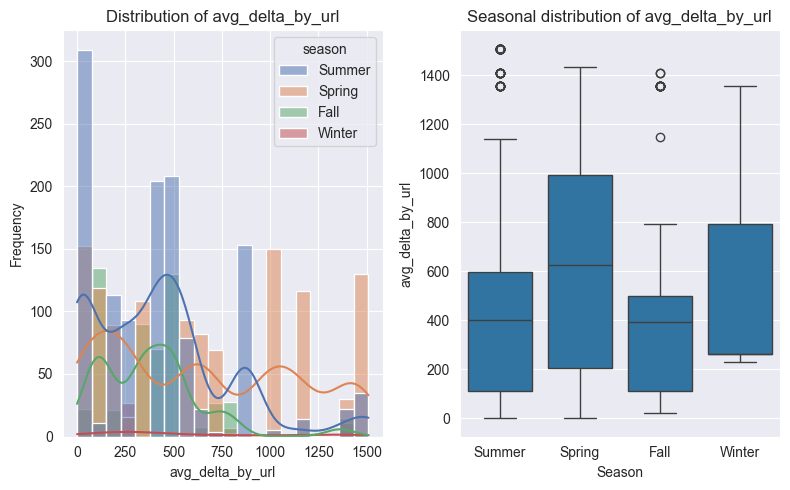

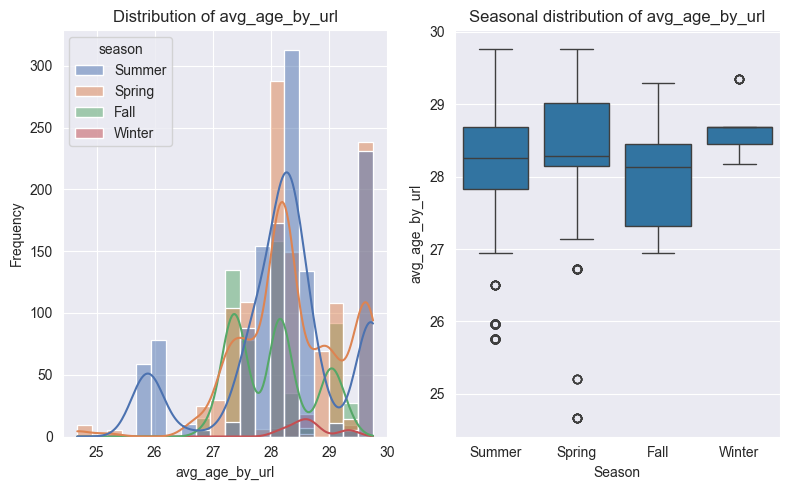

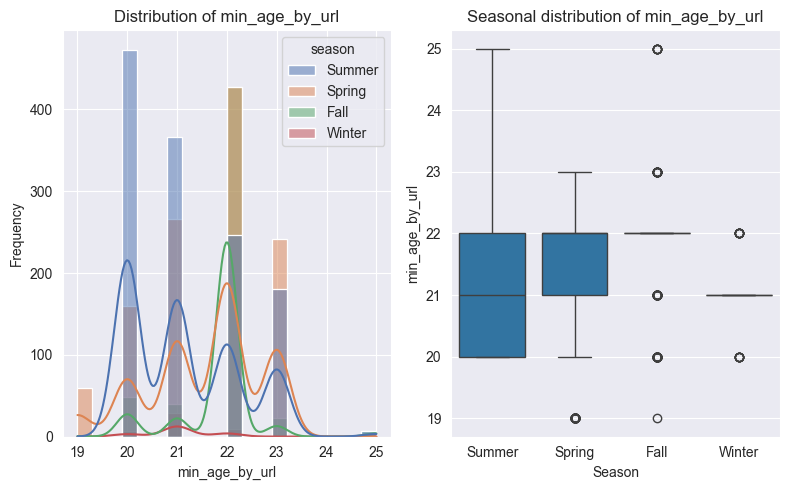

In [59]:
for column in stages_df.select_dtypes("number").columns:
    plt.figure(figsize=(8, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(
        x=column,
        data=stages_df,
        kde=True,
        hue="season",
        bins=20,
        palette="deep",
    )
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.subplot(1, 2, 2)
    sns.boxplot(x="season", y=column, data=stages_df)
    plt.title(f"Seasonal distribution of {column}")
    plt.xlabel("Season")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

#### pairplot for profile and seasons

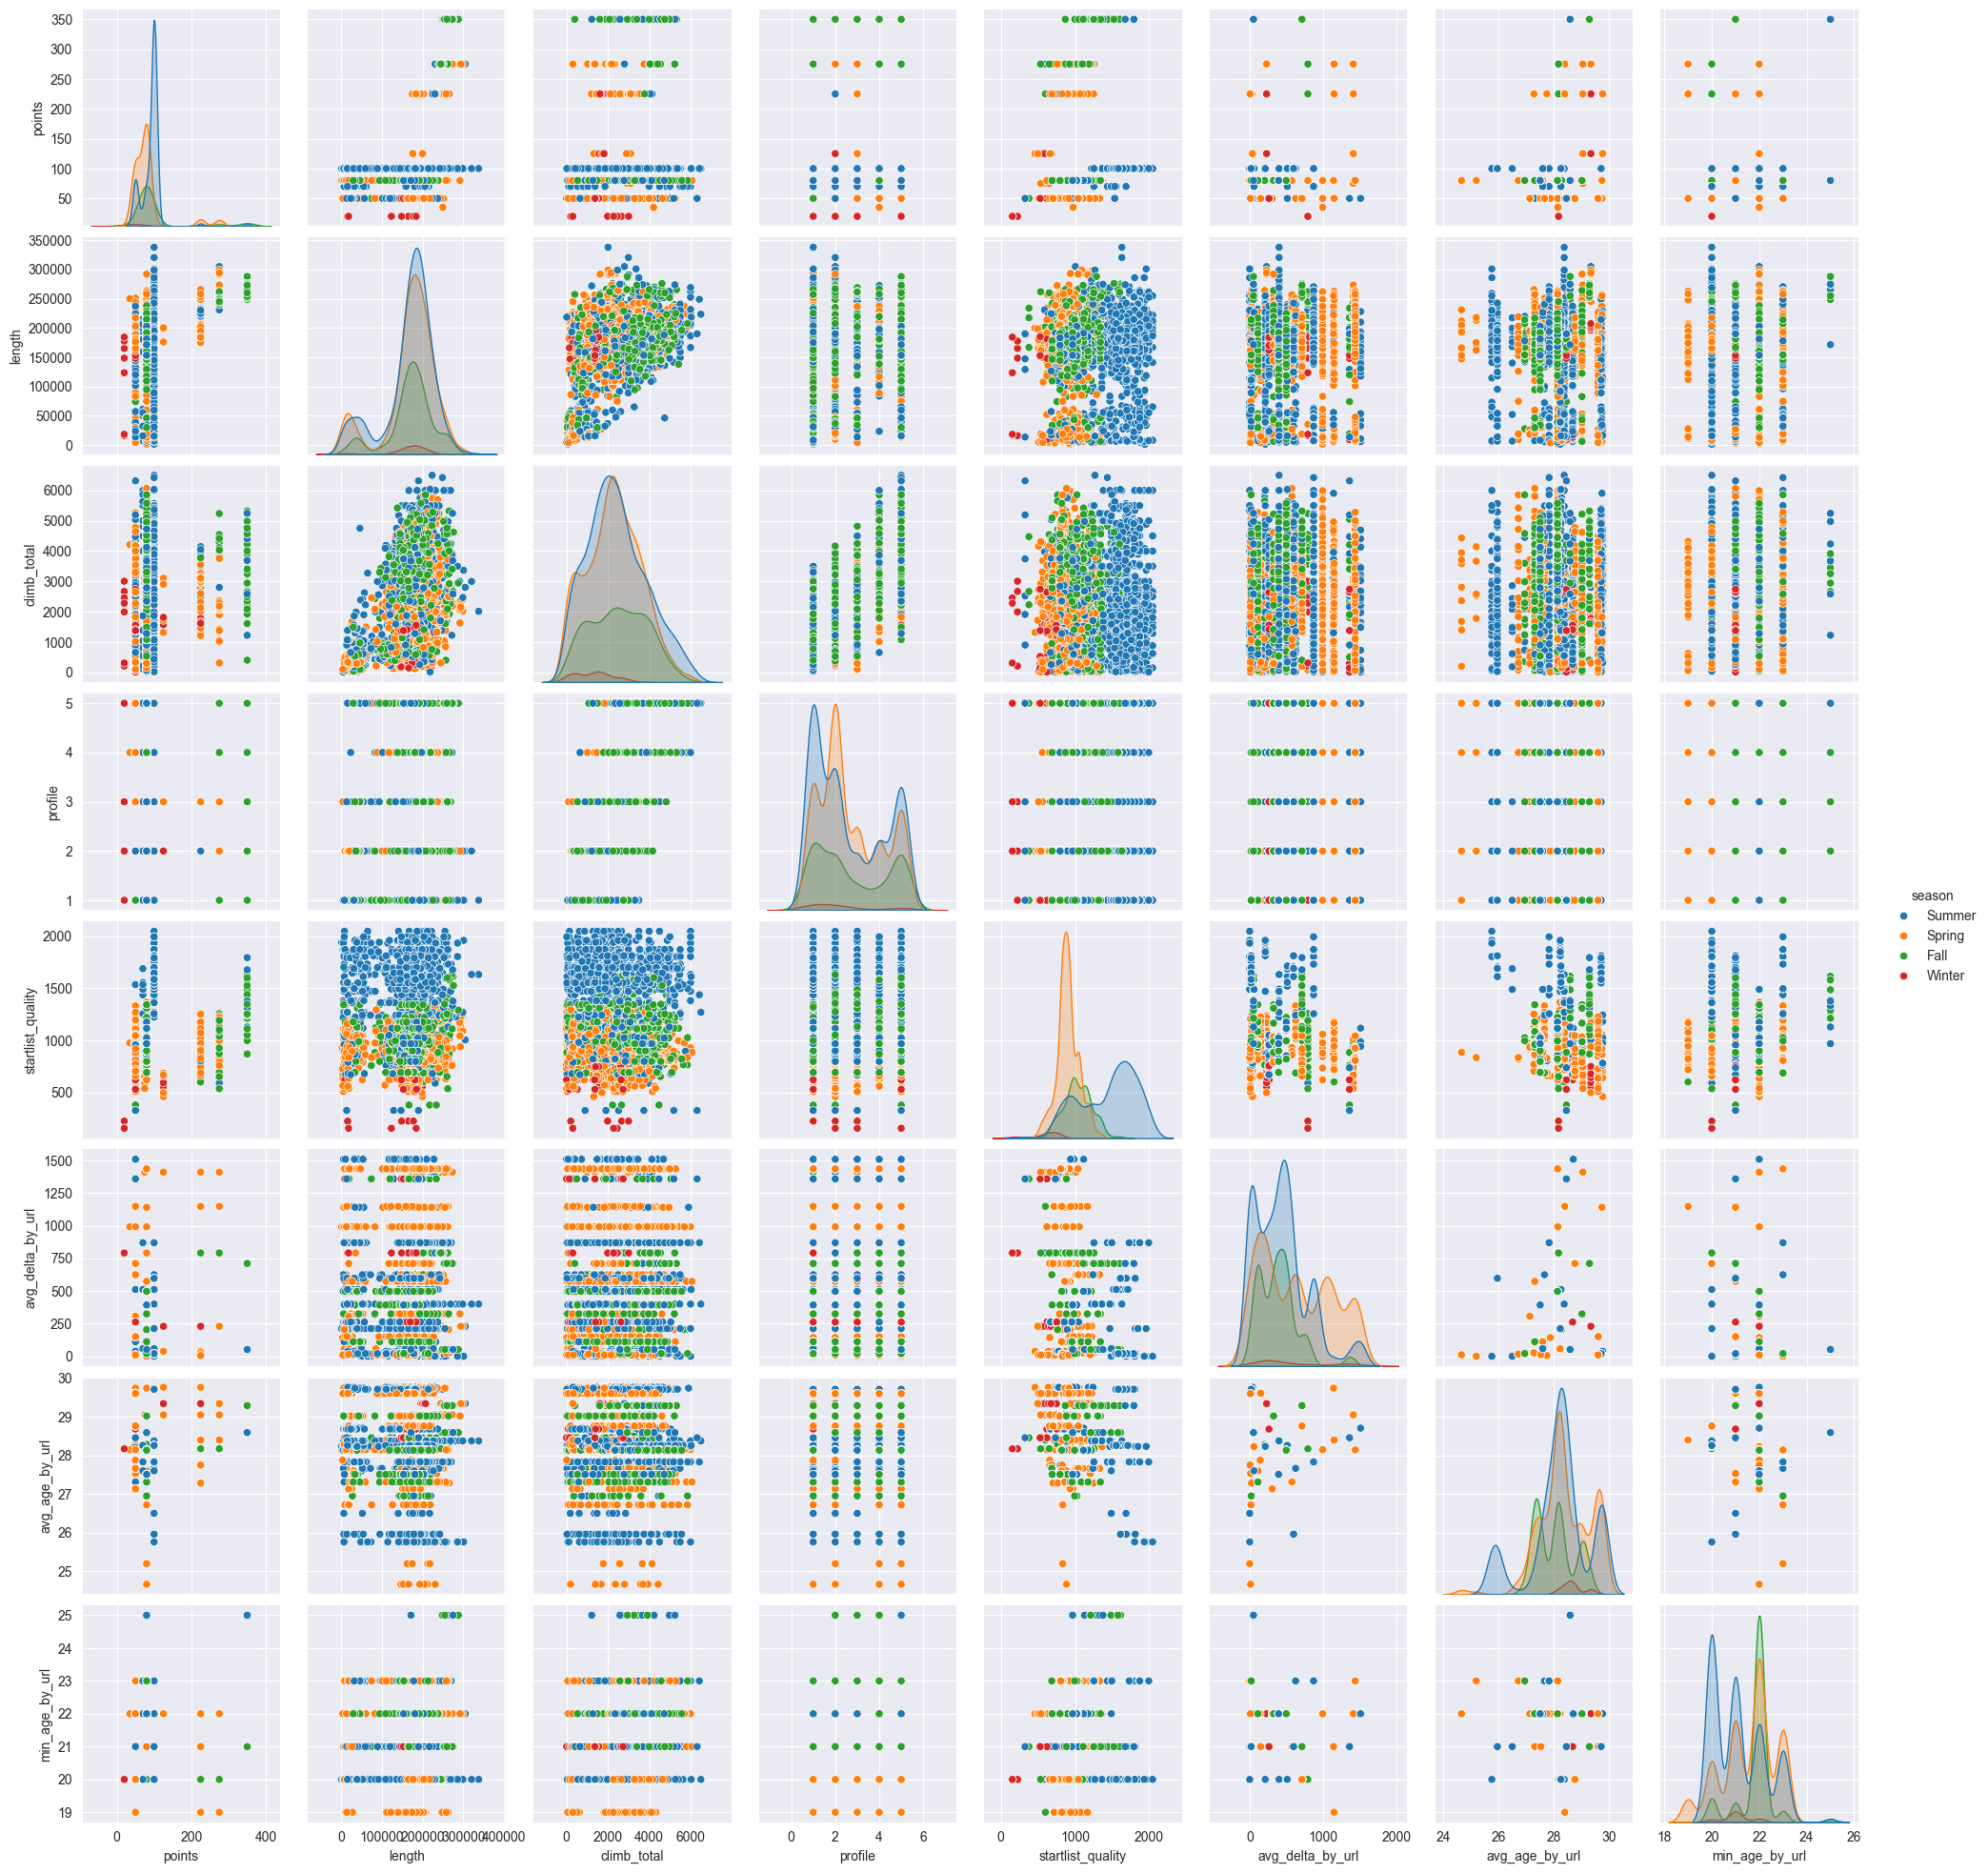

In [60]:
df_to_plot = stages_df.select_dtypes("number").drop(columns=["year"])
df_to_plot["season"] = stages_df["season"]
df_to_plot["profile"] = stages_df["profile"]
sns.pairplot(df_to_plot, hue="season")

#### PCA for profile and seasons

In [61]:
stages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _url               3021 non-null   string        
 1   stage              3021 non-null   string        
 2   race               3021 non-null   string        
 3   date               3021 non-null   datetime64[ns]
 4   points             3021 non-null   Int64         
 5   length             3021 non-null   Int64         
 6   climb_total        3021 non-null   Int64         
 7   profile            3021 non-null   Int64         
 8   startlist_quality  3021 non-null   Int64         
 9   year               3021 non-null   Int64         
 10  season             3021 non-null   string        
 11  avg_delta_by_url   3021 non-null   Float64       
 12  avg_age_by_url     3021 non-null   Float64       
 13  min_age_by_url     3021 non-null   Int64         
dtypes: Float

In [62]:
pca_instance = PCA(random_state=42)
pca_no_year = PCA(random_state=42)
pca_transformation = pca_instance.fit_transform(
    stages_df.select_dtypes("number").drop(columns=["profile"])
)
pca_transformation_no_year = pca_no_year.fit_transform(
    stages_df.select_dtypes("number").drop(columns=["profile", "year"])
)
pca_df = pd.DataFrame(pca_transformation[:, :2], columns=["PC1", "PC2"])
pca_df["season"] = stages_df["season"]
pca_df["profile"] = stages_df["profile"]
pca_df_no_year = pd.DataFrame(pca_transformation_no_year[:, :2], columns=["PC1", "PC2"])
pca_df_no_year["season"] = stages_df["season"]
pca_df_no_year["profile"] = stages_df["profile"]

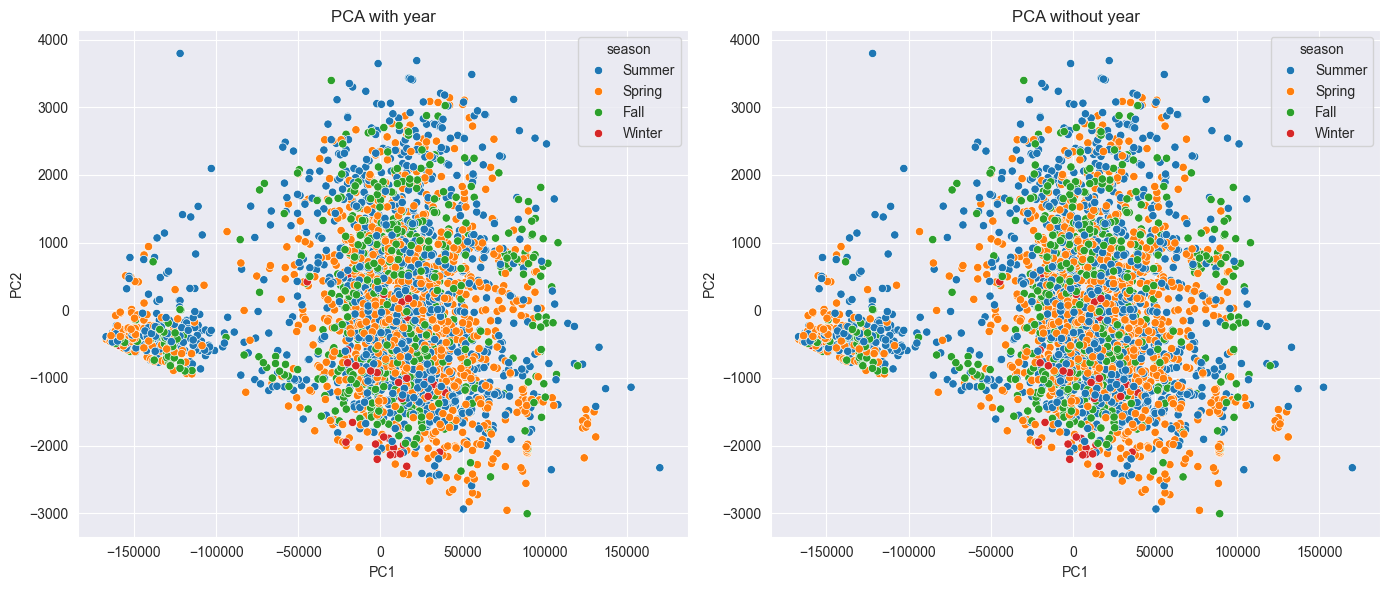

In [63]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="season")
plt.title("PCA with year")
plt.subplot(1, 2, 2)
sns.scatterplot(data=pca_df_no_year, x="PC1", y="PC2", hue="season")
plt.title("PCA without year")
plt.tight_layout()

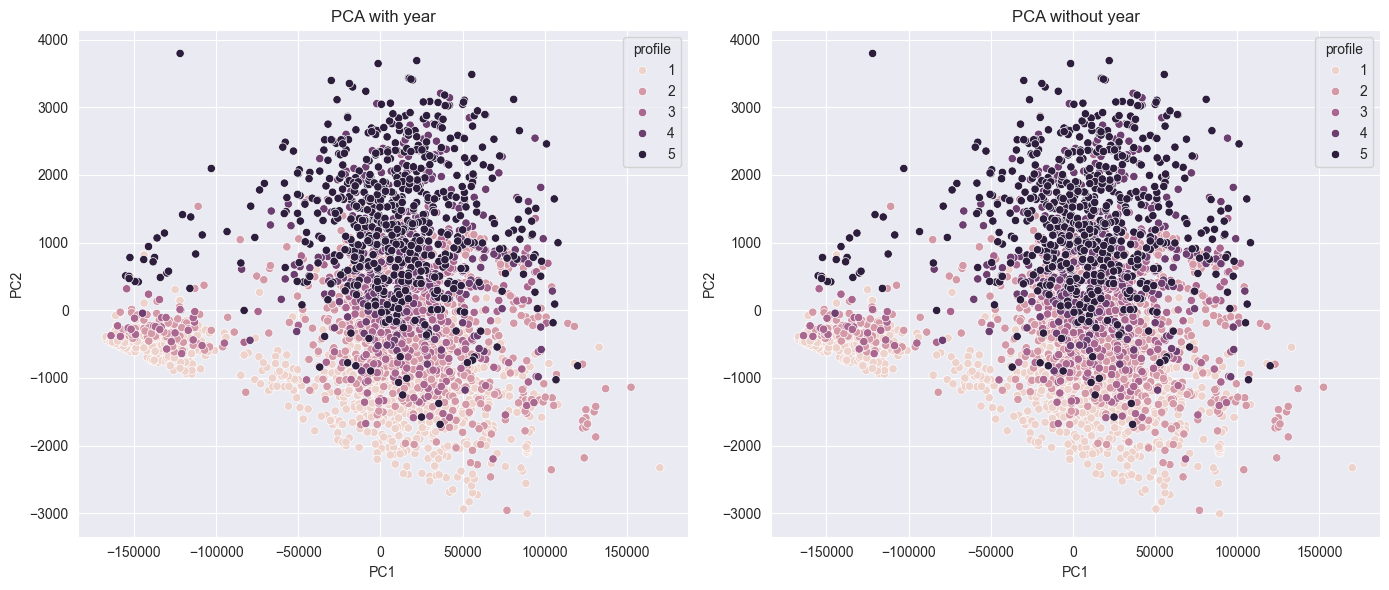

In [64]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="profile")
plt.title("PCA with year")
plt.subplot(1, 2, 2)
sns.scatterplot(data=pca_df_no_year, x="PC1", y="PC2", hue="profile")
plt.title("PCA without year")
plt.tight_layout()

### Merge

In [65]:
merged_df = merged_df.convert_dtypes()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359327 entries, 0 to 359326
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   _url               359327 non-null  string        
 1   position           359327 non-null  Int64         
 2   cyclist            359327 non-null  string        
 3   cyclist_age        359327 non-null  Int64         
 4   delta              359327 non-null  Int64         
 5   stage              359327 non-null  string        
 6   race               359327 non-null  string        
 7   date               359327 non-null  datetime64[ns]
 8   points             359327 non-null  Int64         
 9   length             359327 non-null  Int64         
 10  climb_total        359327 non-null  Int64         
 11  profile            359327 non-null  Int64         
 12  startlist_quality  359327 non-null  Int64         
 13  year               359327 non-null  Int64   

In [66]:
classification_df = merged_df.copy().drop(columns=["delta", "nationality"])
classification_df["position"] = (classification_df["position"] < 20).astype(int)
print(classification_df["position"].value_counts())

position
0    310193
1     49134
Name: count, dtype: int64


#### General PCA for separability in classification

In [67]:
pca_instance = PCA(random_state=42)

pca_transformation = pca_instance.fit_transform(
    classification_df.select_dtypes("number").drop(columns=["position", "profile"])
)
pca_df = pd.DataFrame(pca_transformation[:, :2], columns=["PC1", "PC2"])
pca_df["position"] = classification_df["position"]

<Axes: xlabel='PC1', ylabel='PC2'>

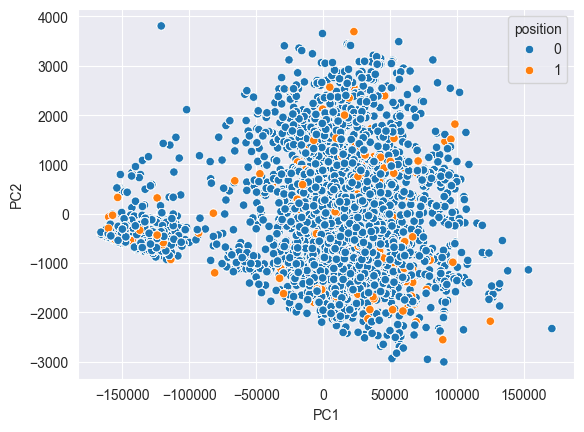

In [68]:
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="position")

#### General Correlation

In [69]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359327 entries, 0 to 359326
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   _url               359327 non-null  string        
 1   position           359327 non-null  Int64         
 2   cyclist            359327 non-null  string        
 3   cyclist_age        359327 non-null  Int64         
 4   delta              359327 non-null  Int64         
 5   stage              359327 non-null  string        
 6   race               359327 non-null  string        
 7   date               359327 non-null  datetime64[ns]
 8   points             359327 non-null  Int64         
 9   length             359327 non-null  Int64         
 10  climb_total        359327 non-null  Int64         
 11  profile            359327 non-null  Int64         
 12  startlist_quality  359327 non-null  Int64         
 13  year               359327 non-null  Int64   

<Axes: >

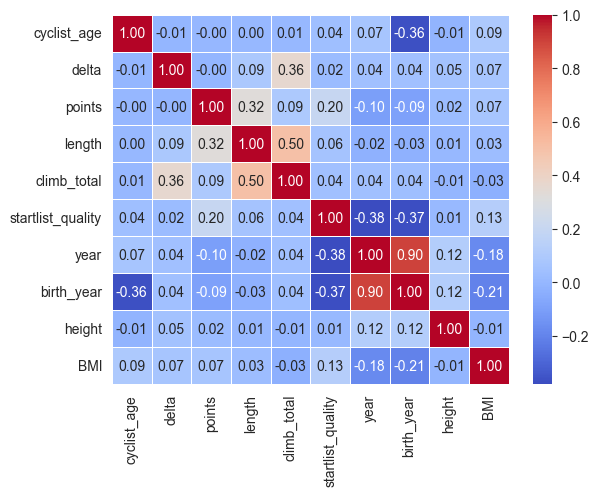

In [70]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(
    merged_df.select_dtypes("number").drop(columns=["position", "profile"])
)
scaled_df = pd.DataFrame(
    scaled_data,
    columns=merged_df.select_dtypes("number")
    .drop(columns=["position", "profile"])
    .columns,
)

correlation_matrix = scaled_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

## Output datasets

In [71]:
cyclist_df.to_csv(DATASET_DIR + "cyclist_clean_v2-AD.csv", index=False)
merged_df.to_csv(DATASET_DIR + "merge_clean_v2-AD.csv", index=False)
stages_df.to_csv(DATASET_DIR + "stages_clean_v2-AD.csv", index=False)